In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

In [2]:
# This sets some plotting things
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

In [3]:
# Extract liquids
out=pt.import_excel('Liquid_LaPalma2021.xlsx', sheet_name="Liquids")
my_input=out['my_input']
myLiquids1=out['Liqs']

# Extract Cpx
out=pt.import_excel('Clinopyroxene.xlsx', sheet_name="Sheet1")
my_input=out['my_input']
Cpxs=out['Cpxs']

In [4]:
display(myLiquids1.head())
display(Cpxs.head())

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,44.07175,3.85725,15.25960,13.34025,0.20820,5.66615,10.29020,4.52895,1.86295,0.0,1.02940,0.0,0.0,0.0,0.0,0.0,0
1,43.48885,3.91850,14.90475,13.60110,0.20900,6.08415,10.58290,4.32170,1.76735,0.0,1.04805,0.0,0.0,0.0,0.0,0.0,1
2,43.70050,3.79525,14.27875,13.68300,0.20410,7.09470,10.71260,4.05095,1.69220,0.0,0.87835,0.0,0.0,0.0,0.0,0.0,2
3,43.78955,3.92430,14.97935,13.59335,0.21130,6.01875,10.60035,4.36675,1.78950,0.0,1.06400,0.0,0.0,0.0,0.0,0.0,3
4,43.55010,3.75070,14.36795,13.42620,0.20385,6.72320,10.60040,4.14975,1.72045,0.0,0.91410,0.0,0.0,0.0,0.0,0.0,4


,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,0
1,45.7765,3.22437,8.26296,8.78043,0.176955,10.6986,22.1711,0.751485,0.000000,0.016159,1
2,44.6986,3.32633,9.08447,9.05639,0.173568,10.5814,22.0897,0.907719,0.001525,0.000000,2
3,45.2122,3.26010,8.91100,8.67503,0.191869,10.8647,22.3832,0.962975,0.004363,0.010779,3
4,46.6183,2.92108,7.91121,8.38594,0.160977,11.7110,22.1802,0.872040,0.000000,0.000000,4


In [5]:
# MM_N17P08
# barometer of Neave and Putirka (2017), and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# following Scruggs and Putirka (2017), we set water based on melt SiO2 content

MM_N17P08=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Neave2017", equationT="T_Put2008_eq33", 
                                         Kd_Match=0.27, Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06,
                                         H2O_Liq=myLiquids1['SiO2_Liq']*0.06995+0.383)

MM_N17P08_Avs=MM_N17P08['Av_PTs']
MM_N17P08_All=MM_N17P08['All_PTs']
MM_N17P08_All_filter = MM_N17P08_All[MM_N17P08_All['Eq Tests Neave2017?']]

Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
the code is evaluating Kd matches using Kd=0.27
1781 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1691 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


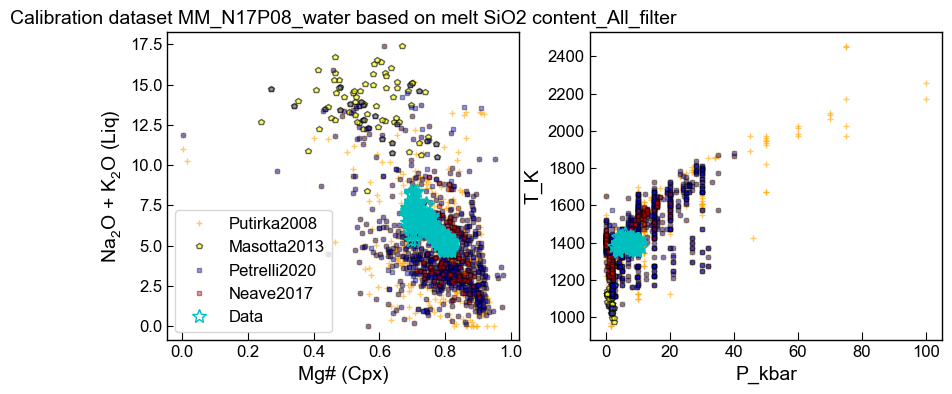

In [6]:
## Calibration Dataset
Petrelli_Cali=pt.return_cali_dataset(model='Petrelli2020')
Neave_Cali=pt.return_cali_dataset(model='Neave2017')
Masotta_Cali=pt.return_cali_dataset(model='Masotta2013')
Putirka08_Cali=pt.return_cali_dataset(model='Putirka2008')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)


ax1.plot(MM_N17P08_All_filter['Mgno_Cpx'],  MM_N17P08_All_filter['Na2O_Liq']+MM_N17P08_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_N17P08_water based on melt SiO2 content_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax2.plot(MM_N17P08_All_filter['P_kbar_calc'],MM_N17P08_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)

fig.savefig('Calibration dataset MM_N17P08_All_filter.png', dpi=1200)

In [7]:
# MM_M13
# Barometer and thermometer of Masotta et al. (2013) for alkaline compositions
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# Kd Kd model of Masotta et al. (2013),which is also a function of Na and K, for trachytic and phonolitic magmas
# following Scruggs and Putirka (2017), we set water based on melt SiO2 content

MM_M13=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs, 
                                    equationP="P_Mas2013_Palk2012", equationT="T_Mas2013_Talk2012",
                                    Kd_Match="Masotta", Kd_Err=0.08, Fe3Fet_Liq=0.15, CaTs_Err=0.06, DiHd_Err=0.12, EnFs_Err=0.06, H2O_Liq=myLiquids1['SiO2_Liq']*0.06995+0.383)

MM_M13_Avs=MM_M13['Av_PTs']
MM_M13_All=MM_M13['All_PTs']
MM_M13_All_filter = MM_M13_All[MM_M13_All['Eq Tests Neave2017?']]

Caution, you have selected to use the Kd-Fe-Mg model of Masotta et al. (2013)which is only valid for trachyte and phonolitic magmas.  use PutKd=True to use the Kd model of Putirka (2008)
Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
Youve selected a P-independent function
Youve selected a P-independent function
2564 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=2562 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


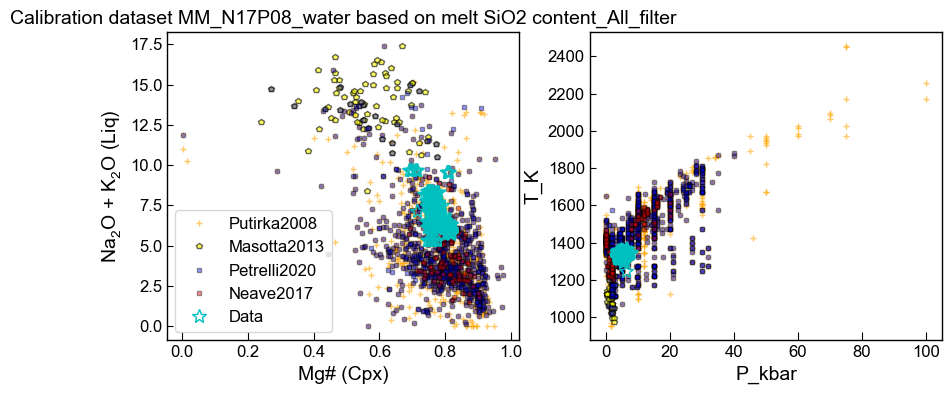

In [8]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)


ax1.plot(MM_M13_All_filter['Mgno_Cpx'],  MM_M13_All_filter['Na2O_Liq']+MM_M13_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_N17P08_water based on melt SiO2 content_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax2.plot(MM_M13_All_filter['P_kbar_calc'],MM_M13_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)

fig.savefig('Calibration dataset MM_M13_All_filter.png', dpi=1200)

In [9]:
# MM_P03
# barometer of Putirka (2003), and the thermometer of Putirka (2003)
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# following Scruggs and Putirka (2017), we set water based on melt SiO2 content

MM_P03=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2003", equationT="T_Put2003", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06,
                                         H2O_Liq=myLiquids1['SiO2_Liq']*0.06995+0.383)

MM_P03_Avs=MM_P03['Av_PTs']
MM_P03_All=MM_P03['All_PTs']
MM_P03_All_filter = MM_P03_All[MM_P03_All['Eq Tests Neave2017?']]

Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
2137 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1515 Cpx-Liq matches using the specified filter. N=33 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


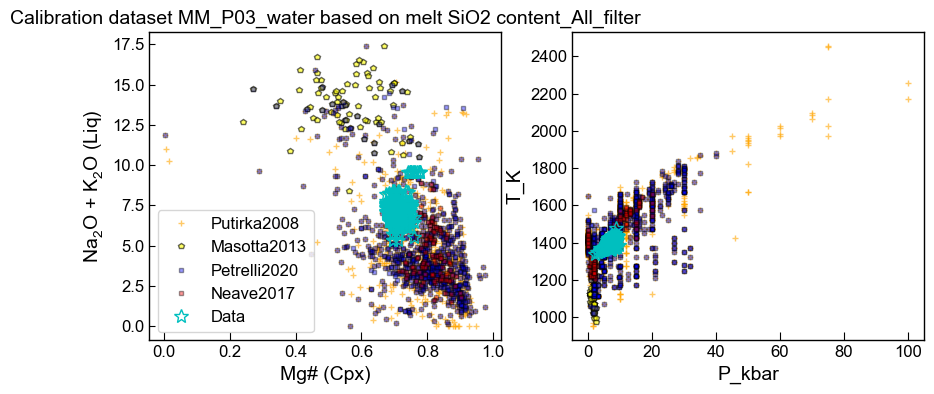

In [10]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_P03_All_filter['Mgno_Cpx'],  MM_P03_All_filter['Na2O_Liq']+MM_P03_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_P03_water based on melt SiO2 content_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax2.plot(MM_P03_All_filter['P_kbar_calc'],MM_P03_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)

fig.savefig('Calibration dataset MM_P03_All_filter.png', dpi=1200)

In [11]:
# MM_P03_P08
# barometer of Putirka (2003), and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# following Scruggs and Putirka (2017), we set water based on melt SiO2 content

MM_P03P08=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2003", equationT="T_Put2008_eq33", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06,
                                         H2O_Liq=myLiquids1['SiO2_Liq']*0.06995+0.383)

MM_P03P08_Avs=MM_P03P08['Av_PTs']
MM_P03P08_All=MM_P03P08['All_PTs']
MM_P03P08_All_filter = MM_P03P08_All[MM_P03P08_All['Eq Tests Neave2017?']]

C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
3323 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1883 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


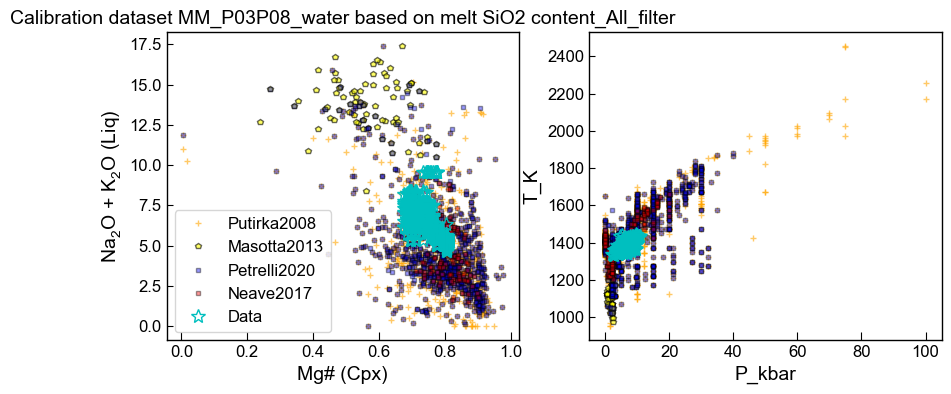

In [12]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_P03P08_All_filter['Mgno_Cpx'],  MM_P03P08_All_filter['Na2O_Liq']+MM_P03P08_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_P03P08_water based on melt SiO2 content_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax2.plot(MM_P03P08_All_filter['P_kbar_calc'],MM_P03P08_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)

fig.savefig('Calibration dataset MM_P03P08_All_filter.png', dpi=1200)

In [13]:
# MM_P08
# barometer of Putirka (2008) eq 30, and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# following Scruggs and Putirka (2017), we set water based on melt SiO2 content

MM_P08=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2008_eq30", equationT="T_Put2008_eq33", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06,
                                         H2O_Liq=myLiquids1['SiO2_Liq']*0.06995+0.383)

MM_P08_Avs=MM_P08['Av_PTs']
MM_P08_All=MM_P08['All_PTs']
MM_P08_All_filter = MM_P08_All[MM_P08_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
3323 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1744 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


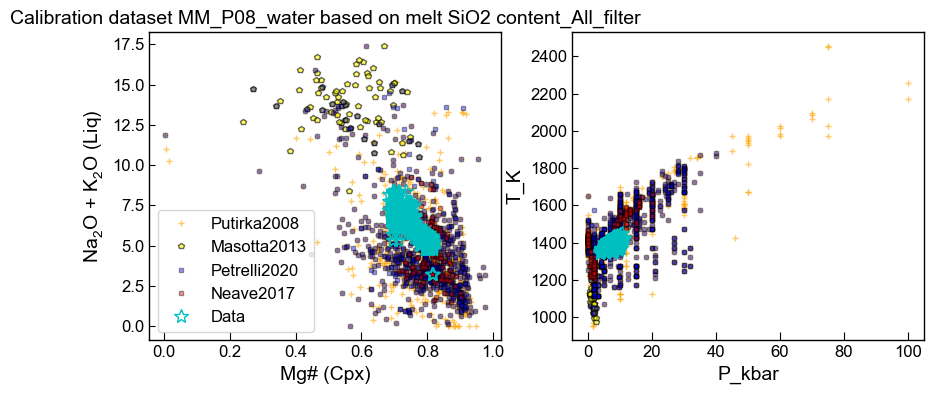

In [14]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_P08_All_filter['Mgno_Cpx'], MM_P08_All_filter['Na2O_Liq']+MM_P08_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_P08_water based on melt SiO2 content_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)


ax2.plot(MM_P08_All_filter['P_kbar_calc'],MM_P08_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_P08_All_filter.png', dpi=1200)

In [15]:
# MM_P96
# barometer of Putirka et al. (1996) eq P2, and the thermometer of Putirka et al. (1996) eq T2
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# following Scruggs and Putirka (2017), we set water based on melt SiO2 content

MM_P96=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put1996_eqP2", equationT="T_Put1996_eqT2", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06,
                                         H2O_Liq=myLiquids1['SiO2_Liq']*0.06995+0.383)

MM_P96_Avs=MM_P96['Av_PTs']
MM_P96_All=MM_P96['All_PTs']
MM_P96_All_filter = MM_P96_All[MM_P96_All['Eq Tests Neave2017?']]

C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
2784 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1189 Cpx-Liq matches using the specified filter. N=28 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


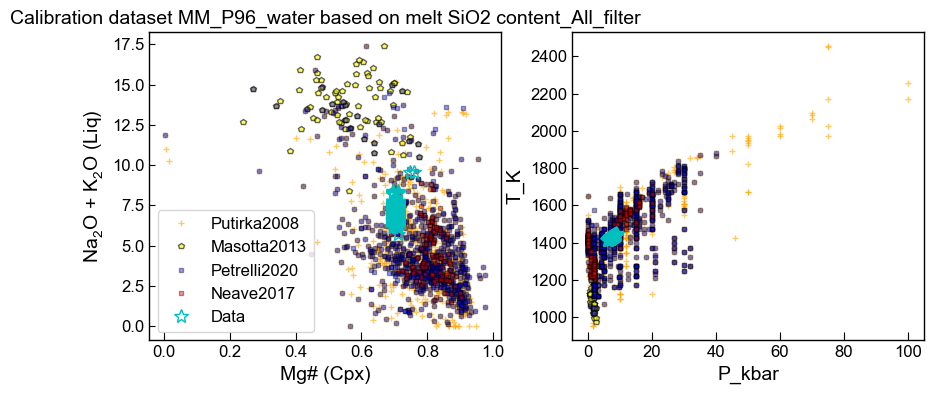

In [16]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_P96_All_filter['Mgno_Cpx'], MM_P96_All_filter['Na2O_Liq']+MM_P96_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_P96_water based on melt SiO2 content_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax2.plot(MM_P96_All_filter['P_kbar_calc'],MM_P96_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_P96_All_filter.png', dpi=1200)

In [17]:
# MM_N17_P08_1H2O
#barometer of Neave and Putirka (2017), and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 1 wt.% water content

MM_N17P08_1H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Neave2017", equationT="T_Put2008_eq33", 
                                         Kd_Match=0.27, Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=1)

MM_N17P08_1H20_Avs=MM_N17P08_1H20['Av_PTs']
MM_N17P08_1H20_All=MM_N17P08_1H20['All_PTs']
MM_N17P08_1H20_All_filter = MM_N17P08_1H20_All[MM_N17P08_1H20_All['Eq Tests Neave2017?']]

C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
the code is evaluating Kd matches using Kd=0.27
1781 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1582 Cpx-Liq matches using the specified filter. N=40 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


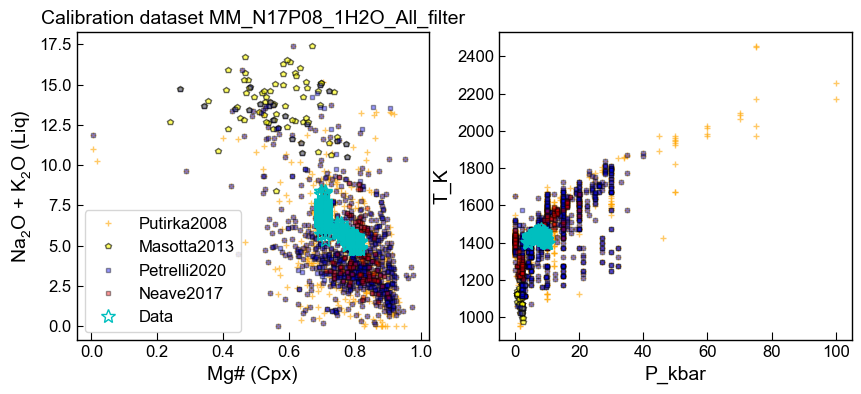

In [18]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_N17P08_1H20_All_filter['Mgno_Cpx'], MM_N17P08_1H20_All_filter['Na2O_Liq']+MM_N17P08_1H20_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_N17P08_1H2O_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax2.plot(MM_N17P08_1H20_All_filter['P_kbar_calc'],MM_N17P08_1H20_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_N17P08_1H2O_All_filter.png', dpi=1200)

In [19]:
# MM_M13_1H2O
# Barometer and thermometer of Masotta et al. (2013) for alkaline compositions
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# Kd Kd model of Masotta et al. (2013),which is also a function of Na and K, for trachytic and phonolitic magmas
# we set 1 wt.% water content

MM_M13_1H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs, 
                                    equationP="P_Mas2013_Palk2012", equationT="T_Mas2013_Talk2012",
                                    Kd_Match="Masotta", Kd_Err=0.08, Fe3Fet_Liq=0.15, CaTs_Err=0.06, DiHd_Err=0.12, EnFs_Err=0.06, H2O_Liq=1)

MM_M13_1H20_Avs=MM_M13_1H20['Av_PTs']
MM_M13_1H20_All=MM_M13_1H20['All_PTs']
MM_M13_1H20_All_filter = MM_M13_1H20_All[MM_M13_1H20_All['Eq Tests Neave2017?']]

Caution, you have selected to use the Kd-Fe-Mg model of Masotta et al. (2013)which is only valid for trachyte and phonolitic magmas.  use PutKd=True to use the Kd model of Putirka (2008)
Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
Youve selected a P-independent function
Youve selected a P-independent function
2719 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=2717 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


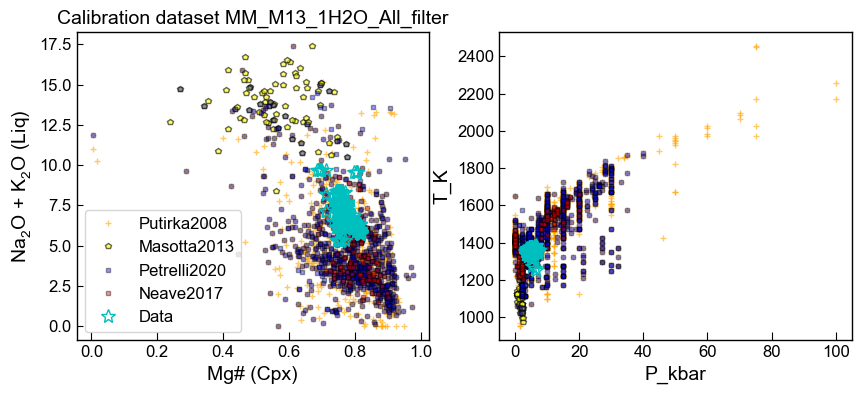

In [20]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_M13_1H20_All_filter['Mgno_Cpx'], MM_M13_1H20_All_filter['Na2O_Liq']+MM_M13_1H20_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_M13_1H2O_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)


ax2.plot(MM_M13_1H20_All_filter['P_kbar_calc'],MM_M13_1H20_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_M13_1H2O_All_filter.png', dpi=1200)

In [21]:
# MM_P03_1H20
# barometer of Putirka et al. (2003), and the thermometer of Putirka (2003)
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 1 wt.% water content

MM_P03_1H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2003", equationT="T_Put2003", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=1)

MM_P03_1H20_Avs=MM_P03_1H20['Av_PTs']
MM_P03_1H20_All=MM_P03_1H20['All_PTs']
MM_P03_1H20_All_filter = MM_P03_1H20_All[MM_P03_1H20_All['Eq Tests Neave2017?']]

C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
2137 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1515 Cpx-Liq matches using the specified filter. N=33 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


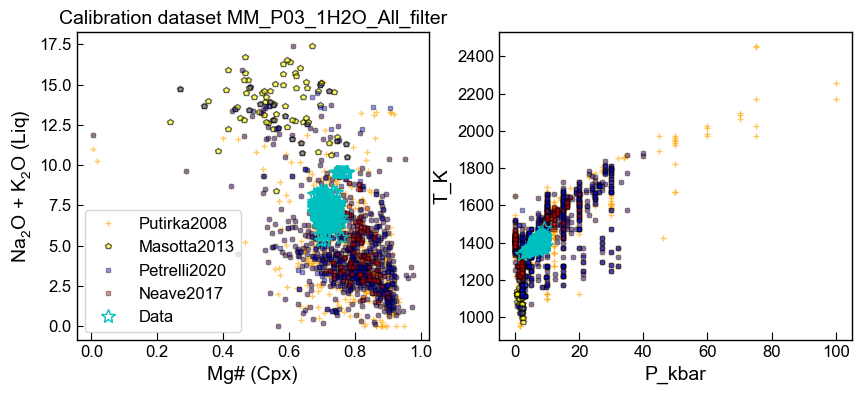

In [22]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_P03_1H20_All_filter['Mgno_Cpx'], MM_P03_1H20_All_filter['Na2O_Liq']+MM_P03_1H20_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_P03_1H2O_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)


ax2.plot(MM_P03_1H20_All_filter['P_kbar_calc'],MM_P03_1H20_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_P03_1H2O_All_filter.png', dpi=1200)

In [23]:
# MM_P03P08_1H20
# barometer of Putirka et al. (2003), and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 1 wt.% water content

MM_P03P08_1H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2003", equationT="T_Put2008_eq33", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=1)

MM_P03P08_1H20_Avs=MM_P03P08_1H20['Av_PTs']
MM_P03P08_1H20_All=MM_P03P08_1H20['All_PTs']
MM_P03P08_1H20_All_filter = MM_P03P08_1H20_All[MM_P03P08_1H20_All['Eq Tests Neave2017?']]

C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
3140 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1475 Cpx-Liq matches using the specified filter. N=34 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


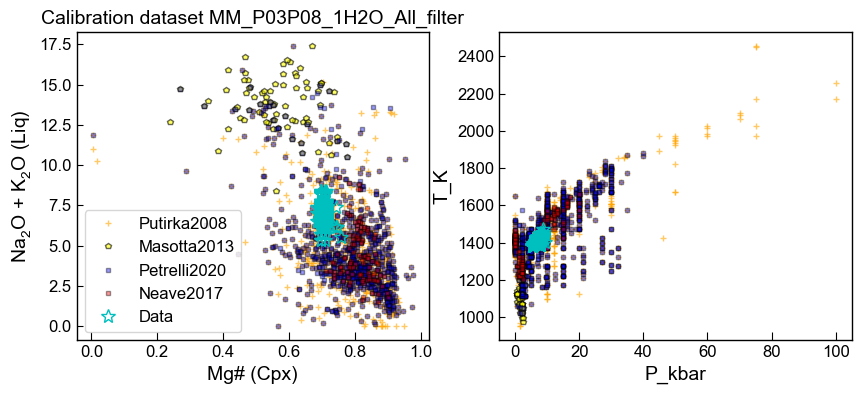

In [24]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_P03P08_1H20_All_filter['Mgno_Cpx'], MM_P03P08_1H20_All_filter['Na2O_Liq']+MM_P03P08_1H20_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_P03P08_1H2O_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)


ax2.plot(MM_P03P08_1H20_All_filter['P_kbar_calc'],MM_P03P08_1H20_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_P03P08_1H2O_All_filter.png', dpi=1200)

In [25]:
# MM_P08_1H20
# barometer of Putirka (2008) eq 30, and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 1 wt.% water content

MM_P08_1H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2008_eq30", equationT="T_Put2008_eq33", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=1)

MM_P08_1H20_Avs=MM_P08_1H20['Av_PTs']
MM_P08_1H20_All=MM_P08_1H20['All_PTs']
MM_P08_1H20_All_filter = MM_P08_1H20_All[MM_P08_1H20_All['Eq Tests Neave2017?']]

C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
3140 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1642 Cpx-Liq matches using the specified filter. N=41 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


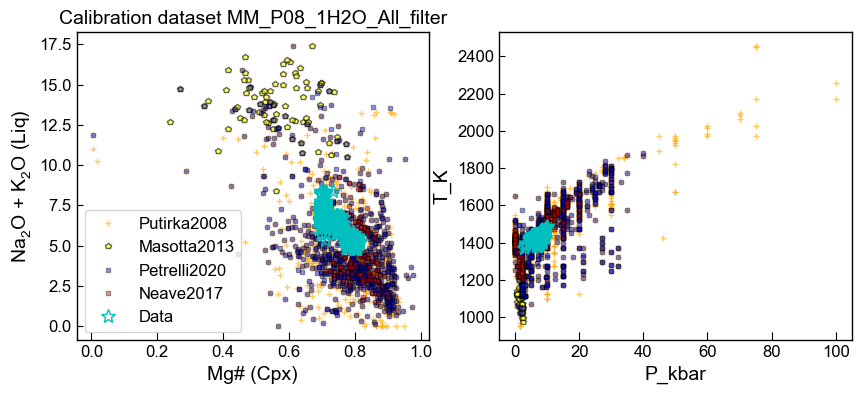

In [26]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_P08_1H20_All_filter['Mgno_Cpx'], MM_P08_1H20_All_filter['Na2O_Liq']+MM_P08_1H20_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_P08_1H2O_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)


ax2.plot(MM_P08_1H20_All_filter['P_kbar_calc'],MM_P08_1H20_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_P08_1H2O_All_filter.png', dpi=1200)

In [27]:
# MM_P96_1H2O
# barometer of Putirka et al. (1996) eq P2, and the thermometer of Putirka et al. (1996) eq T2
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 1 wt.% water content

MM_P96_1H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put1996_eqP2", equationT="T_Put1996_eqT2", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=1)

MM_P96_1H20_Avs=MM_P96_1H20['Av_PTs']
MM_P96_1H20_All=MM_P96_1H20['All_PTs']
MM_P96_1H20_All_filter = MM_P96_1H20_All[MM_P96_1H20_All['Eq Tests Neave2017?']]

Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
2784 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1189 Cpx-Liq matches using the specified filter. N=28 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


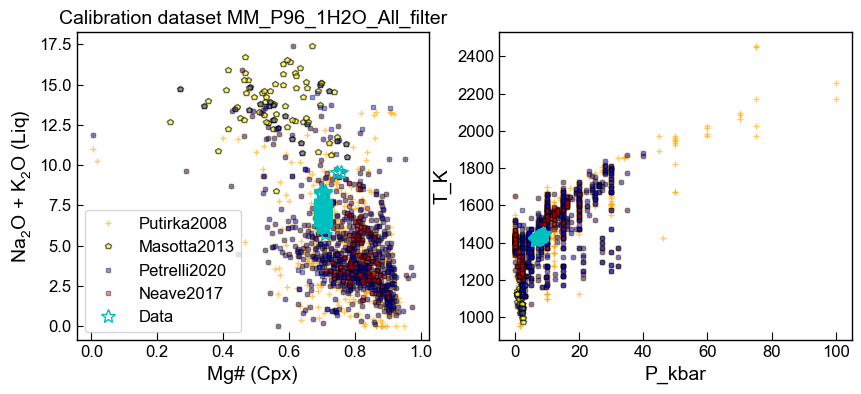

In [28]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_P96_1H20_All_filter['Mgno_Cpx'], MM_P96_1H20_All_filter['Na2O_Liq']+MM_P96_1H20_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_P96_1H2O_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax2.plot(MM_P96_1H20_All_filter['P_kbar_calc'],MM_P96_1H20_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_P96_1H2O_All_filter.png', dpi=1200)

In [29]:
# MM_N17P08_2H2O
# barometer of Neave and Putirka (2017), and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 2 wt.% water content

MM_N17P08_2H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Neave2017", equationT="T_Put2008_eq33", 
                                         Kd_Match=0.27, Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=2)

MM_N17P08_2H20_Avs=MM_N17P08_2H20['Av_PTs']
MM_N17P08_2H20_All=MM_N17P08_2H20['All_PTs']
MM_N17P08_2H20_All_filter = MM_N17P08_2H20_All[MM_N17P08_2H20_All['Eq Tests Neave2017?']]

C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
the code is evaluating Kd matches using Kd=0.27
1781 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1635 Cpx-Liq matches using the specified filter. N=41 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


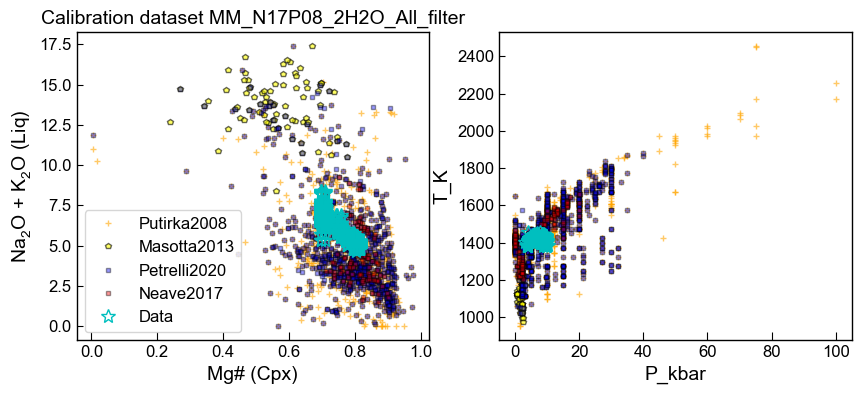

In [30]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_N17P08_2H20_All_filter['Mgno_Cpx'], MM_N17P08_2H20_All_filter['Na2O_Liq']+MM_N17P08_2H20_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_N17P08_2H2O_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)


ax2.plot(MM_N17P08_2H20_All_filter['P_kbar_calc'],MM_N17P08_2H20_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_N17P08_2H2O_All_filter.png', dpi=1200)

In [31]:
# MM_M13_2H2O
# Barometer and thermometer of Masotta et al. (2013) for alkaline compositions
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# Kd Kd model of Masotta et al. (2013),which is also a function of Na and K, for trachytic and phonolitic magmas
# we set 2 wt.% water content

MM_M13_2H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs, 
                                    equationP="P_Mas2013_Palk2012", equationT="T_Mas2013_Talk2012",
                                    Kd_Match="Masotta", Kd_Err=0.08, Fe3Fet_Liq=0.15, CaTs_Err=0.06, DiHd_Err=0.12, EnFs_Err=0.06, H2O_Liq=2)

MM_M13_2H20_Avs=MM_M13_2H20['Av_PTs']
MM_M13_2H20_All=MM_M13_2H20['All_PTs']
MM_M13_2H20_All_filter = MM_M13_2H20_All[MM_M13_2H20_All['Eq Tests Neave2017?']]

Caution, you have selected to use the Kd-Fe-Mg model of Masotta et al. (2013)which is only valid for trachyte and phonolitic magmas.  use PutKd=True to use the Kd model of Putirka (2008)
Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
Youve selected a P-independent function
Youve selected a P-independent function
2666 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=2665 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


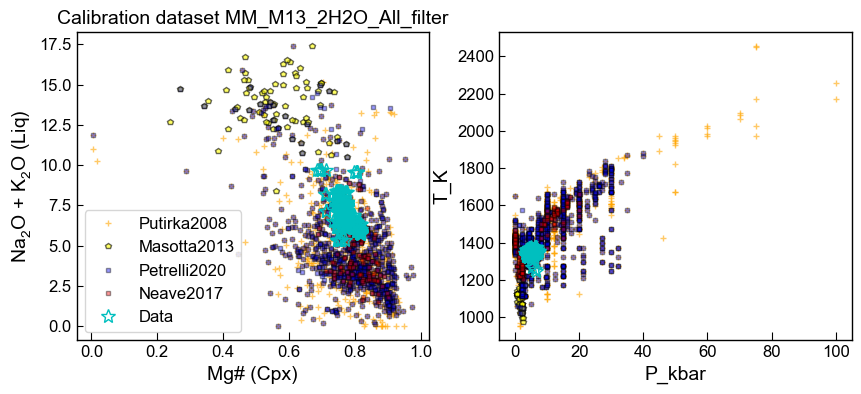

In [32]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_M13_2H20_All_filter['Mgno_Cpx'], MM_M13_2H20_All_filter['Na2O_Liq']+MM_M13_2H20_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_M13_2H2O_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax2.plot(MM_M13_2H20_All_filter['P_kbar_calc'],MM_M13_2H20_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_M13_2H2O_All_filter.png', dpi=1200)

In [33]:
# MM_P03_2H2O
# barometer of Putirka et al. (2003), and the thermometer of Putirka (2003)
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 2 wt.% water content

MM_P03_2H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2003", equationT="T_Put2003", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=2)

MM_P03_2H20_Avs=MM_P03_2H20['Av_PTs']
MM_P03_2H20_All=MM_P03_2H20['All_PTs']
MM_P03_2H20_All_filter = MM_P03_2H20_All[MM_P03_2H20_All['Eq Tests Neave2017?']]

C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
2137 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1515 Cpx-Liq matches using the specified filter. N=33 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


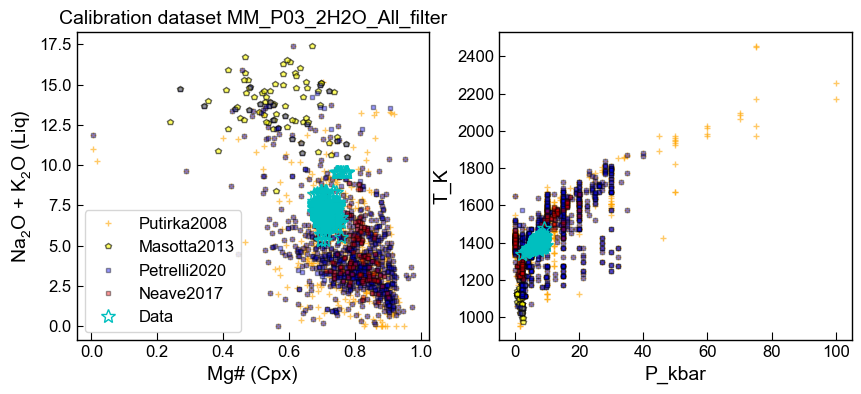

In [34]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_P03_2H20_All_filter['Mgno_Cpx'], MM_P03_2H20_All_filter['Na2O_Liq']+MM_P03_2H20_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_P03_2H2O_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)


ax2.plot(MM_P03_2H20_All_filter['P_kbar_calc'],MM_P03_2H20_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_P03_2H2O_All_filter.png', dpi=1200)

In [35]:
# MM_P03P08_2H2O
# barometer of Putirka et al. (2003), and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 2 wt.% water content

MM_P03P08_2H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2003", equationT="T_Put2008_eq33", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=2)

MM_P03P08_2H20_Avs=MM_P03P08_2H20['Av_PTs']
MM_P03P08_2H20_All=MM_P03P08_2H20['All_PTs']
MM_P03P08_2H20_All_filter = MM_P03P08_2H20_All[MM_P03P08_2H20_All['Eq Tests Neave2017?']]

C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
3220 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1639 Cpx-Liq matches using the specified filter. N=40 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


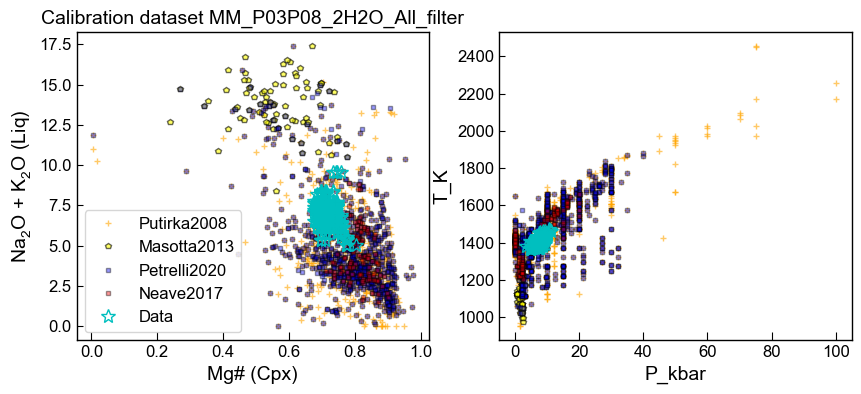

In [36]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_P03P08_2H20_All_filter['Mgno_Cpx'], MM_P03P08_2H20_All_filter['Na2O_Liq']+MM_P03P08_2H20_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_P03P08_2H2O_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)


ax2.plot(MM_P03P08_2H20_All_filter['P_kbar_calc'],MM_P03P08_2H20_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_P03P08_2H2O_All_filter.png', dpi=1200)

In [37]:
# MM_P08_2H2O
# barometer of Putirka (2008) eq 30, and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 2 wt.% water content

MM_P08_2H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2008_eq30", equationT="T_Put2008_eq33", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=2)

MM_P08_2H20_Avs=MM_P08_2H20['Av_PTs']
MM_P08_2H20_All=MM_P08_2H20['All_PTs']
MM_P08_2H20_All_filter = MM_P08_2H20_All[MM_P08_2H20_All['Eq Tests Neave2017?']]

C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
3220 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1705 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


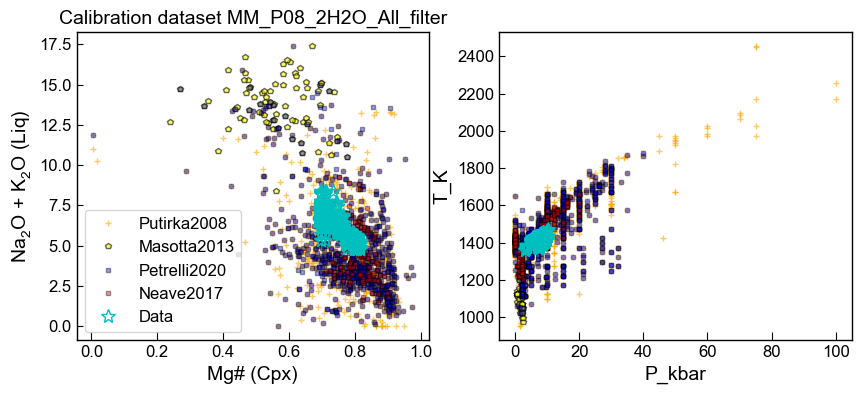

In [38]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_P08_2H20_All_filter['Mgno_Cpx'], MM_P08_2H20_All_filter['Na2O_Liq']+MM_P08_2H20_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_P08_2H2O_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax2.plot(MM_P08_2H20_All_filter['P_kbar_calc'],MM_P08_2H20_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_P08_2H2O_All_filter.png', dpi=1200)

In [39]:
# MM_P96_2H20
# barometer of Putirka et al. (1996) eq P2, and the thermometer of Putirka et al. (1996) eq T2
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# following Scruggs and Putirka (2017), we set water based on melt SiO2 content

MM_P96_2H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put1996_eqP2", equationT="T_Put1996_eqT2", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=2)

MM_P96_2H20_Avs=MM_P96_2H20['Av_PTs']
MM_P96_2H20_All=MM_P96_2H20['All_PTs']
MM_P96_2H20_All_filter = MM_P96_2H20_All[MM_P96_2H20_All['Eq Tests Neave2017?']]

C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
2784 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1189 Cpx-Liq matches using the specified filter. N=28 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


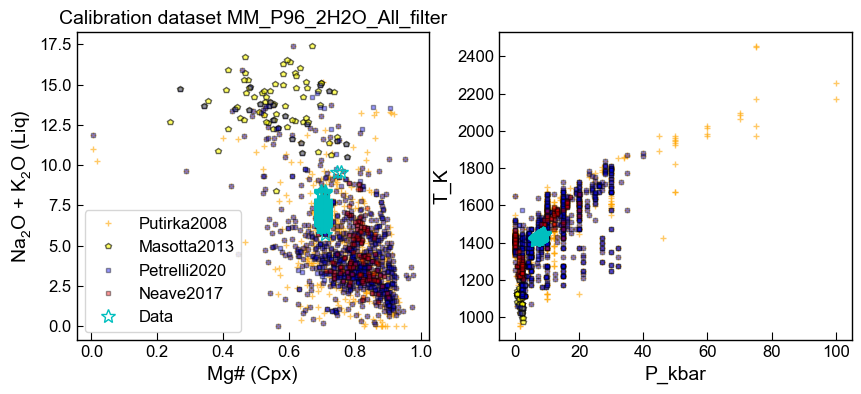

In [40]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)
ax1.plot(MM_P96_2H20_All_filter['Mgno_Cpx'], MM_P96_2H20_All_filter['Na2O_Liq']+MM_P96_2H20_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_P96_2H2O_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)


ax2.plot(MM_P96_2H20_All_filter['P_kbar_calc'],MM_P96_2H20_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_P96_2H2O_All_filter.png', dpi=1200)

In [41]:
# MM_N17P08_3H2O
# barometer of Neave and Putirka (2017), and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 3 wt.% water content

MM_N17P08_3H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Neave2017", equationT="T_Put2008_eq33", 
                                         Kd_Match=0.27, Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=3)

MM_N17P08_3H20_Avs=MM_N17P08_3H20['Av_PTs']
MM_N17P08_3H20_All=MM_N17P08_3H20['All_PTs']
MM_N17P08_3H20_All_filter = MM_N17P08_3H20_All[MM_N17P08_3H20_All['Eq Tests Neave2017?']]

Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
the code is evaluating Kd matches using Kd=0.27
1781 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1667 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


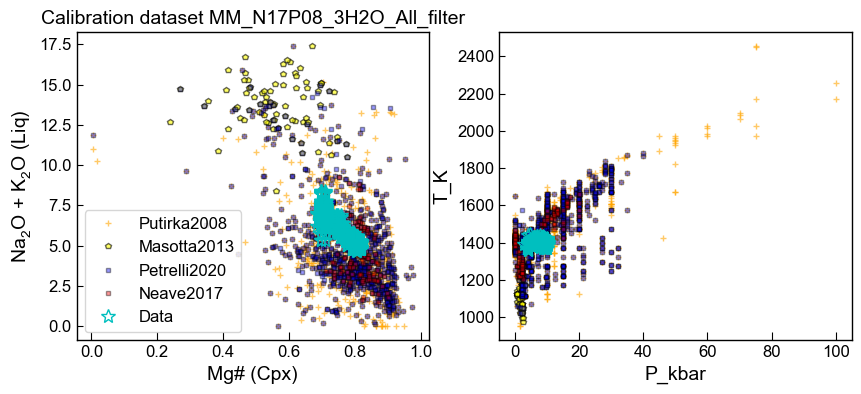

In [42]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_N17P08_3H20_All_filter['Mgno_Cpx'], MM_N17P08_3H20_All_filter['Na2O_Liq']+MM_N17P08_3H20_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_N17P08_3H2O_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)


ax2.plot(MM_N17P08_3H20_All_filter['P_kbar_calc'],MM_N17P08_3H20_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_N17P08_3H2O_All_filter.png', dpi=1200)

In [43]:
# MM_M13_3H2O
# Barometer and thermometer of Masotta et al. (2013) for alkaline compositions
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# Kd Kd model of Masotta et al. (2013),which is also a function of Na and K, for trachytic and phonolitic magmas
# we set 3 wt.% water content

MM_M13_3H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs, 
                                    equationP="P_Mas2013_Palk2012", equationT="T_Mas2013_Talk2012",
                                    Kd_Match="Masotta", Kd_Err=0.08, Fe3Fet_Liq=0.15, CaTs_Err=0.06, DiHd_Err=0.12, EnFs_Err=0.06, H2O_Liq=3)

MM_M13_3H20_Avs=MM_M13_3H20['Av_PTs']
MM_M13_3H20_All=MM_M13_3H20['All_PTs']
MM_M13_3H20_All_filter = MM_M13_3H20_All[MM_M13_3H20_All['Eq Tests Neave2017?']]

Caution, you have selected to use the Kd-Fe-Mg model of Masotta et al. (2013)which is only valid for trachyte and phonolitic magmas.  use PutKd=True to use the Kd model of Putirka (2008)
Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
Youve selected a P-independent function
Youve selected a P-independent function
2603 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Finished calculating Ps and Ts, now just averaging the results. Almost there!


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Done!!! I found a total of N=2602 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


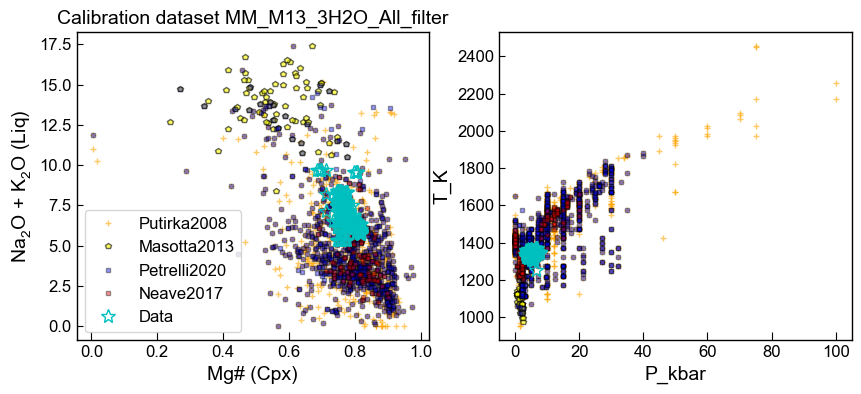

In [44]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_M13_3H20_All_filter['Mgno_Cpx'], MM_M13_3H20_All_filter['Na2O_Liq']+MM_M13_3H20_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_M13_3H2O_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)


ax2.plot(MM_M13_3H20_All_filter['P_kbar_calc'],MM_M13_3H20_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_M13_3H2O_All_filter.png', dpi=1200)

In [45]:
# MM_P03_3H2O
# barometer of Putirka et al. (2003), and the thermometer of Putirka (2003)
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 3 wt.% water content

MM_P03_3H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2003", equationT="T_Put2003", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=3)

MM_P03_3H20_Avs=MM_P03_3H20['Av_PTs']
MM_P03_3H20_All=MM_P03_3H20['All_PTs']
MM_P03_3H20_All_filter = MM_P03_3H20_All[MM_P03_3H20_All['Eq Tests Neave2017?']]

Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
2137 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1515 Cpx-Liq matches using the specified filter. N=33 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


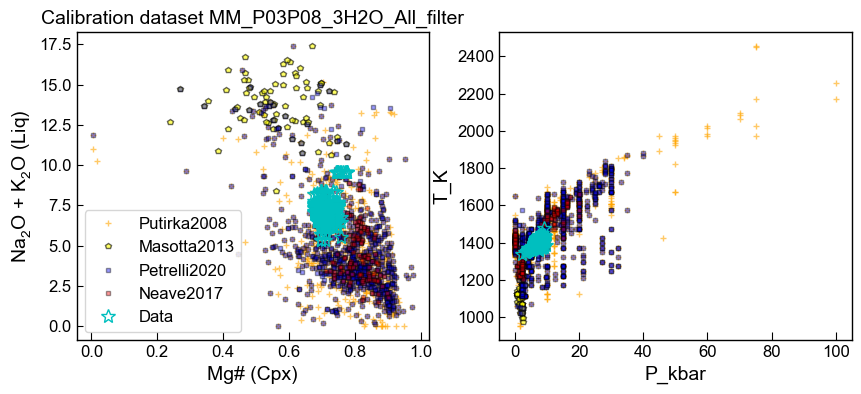

In [46]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_P03_3H20_All_filter['Mgno_Cpx'], MM_P03_3H20_All_filter['Na2O_Liq']+MM_P03_3H20_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_P03P08_3H2O_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)


ax2.plot(MM_P03_3H20_All_filter['P_kbar_calc'],MM_P03_3H20_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_P03_3H2O_All_filter.png', dpi=1200)

In [47]:
# MM_P03P08_3H2O
# barometer of Putirka et al. (2003), and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 3 wt.% water content

MM_P03P08_3H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2003", equationT="T_Put2008_eq33", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=3)

MM_P03P08_3H20_Avs=MM_P03P08_3H20['Av_PTs']
MM_P03P08_3H20_All=MM_P03P08_3H20['All_PTs']
MM_P03P08_3H20_All_filter = MM_P03P08_3H20_All[MM_P03P08_3H20_All['Eq Tests Neave2017?']]

C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
3289 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1834 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


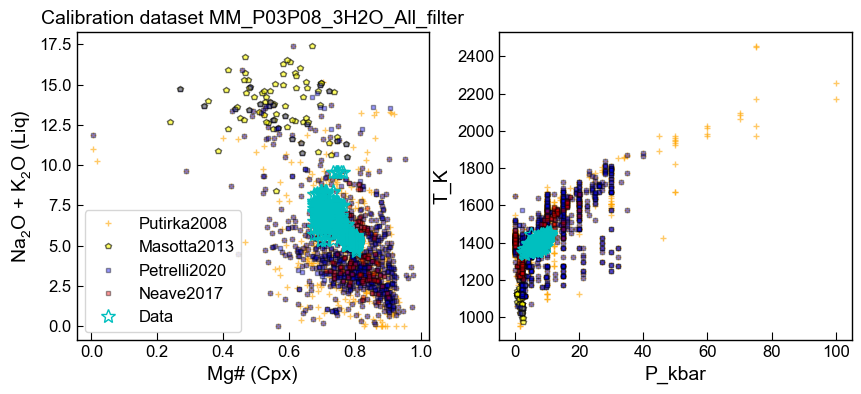

In [48]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_P03P08_3H20_All_filter['Mgno_Cpx'], MM_P03P08_3H20_All_filter['Na2O_Liq']+MM_P03P08_3H20_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_P03P08_3H2O_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)


ax2.plot(MM_P03P08_3H20_All_filter['P_kbar_calc'],MM_P03P08_3H20_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_P03P08_3H2O_All_filter.png', dpi=1200)

In [49]:
# MM_P08_3H2O
# barometer of Putirka et al. (2003), and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 3 wt.% water content

MM_P08_3H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2008_eq30", equationT="T_Put2008_eq33", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=3)

MM_P08_3H20_Avs=MM_P08_3H20['Av_PTs']
MM_P08_3H20_All=MM_P08_3H20['All_PTs']
MM_P08_3H20_All_filter = MM_P08_3H20_All[MM_P08_3H20_All['Eq Tests Neave2017?']]

C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
3289 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1731 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


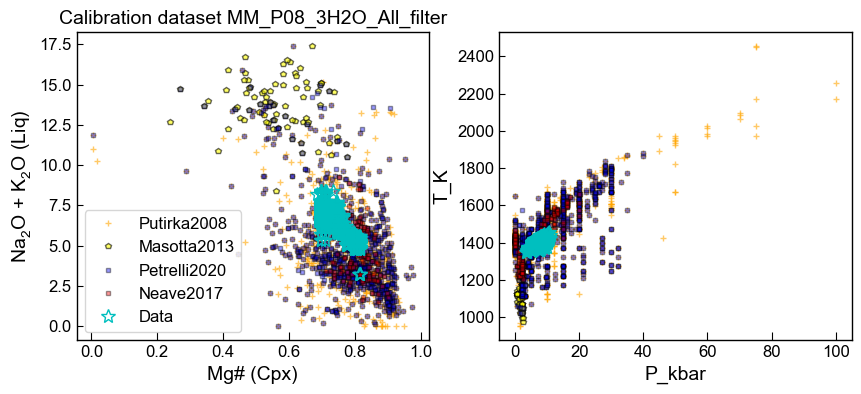

In [50]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_P08_3H20_All_filter['Mgno_Cpx'],MM_P08_3H20_All_filter['Na2O_Liq']+MM_P08_3H20_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_P08_3H2O_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)


ax2.plot(MM_P08_3H20_All_filter['P_kbar_calc'],MM_P08_3H20_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
fig.savefig('Calibration dataset MM_P08_3H2O_All_filter.png', dpi=1200)

In [51]:
# MM_P96_3H2O
# barometer of Putirka et al. (1996) eq P2, and the thermometer of Putirka et al. (1996) eq T2
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 3 wt.% water content

MM_P96_3H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put1996_eqP2", equationT="T_Put1996_eqT2", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=3)

MM_P96_3H20_Avs=MM_P96_3H20['Av_PTs']
MM_P96_3H20_All=MM_P96_3H20['All_PTs']
MM_P96_3H20_All_filter = MM_P96_3H20_All[MM_P96_3H20_All['Eq Tests Neave2017?']]

C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
2784 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1189 Cpx-Liq matches using the specified filter. N=28 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


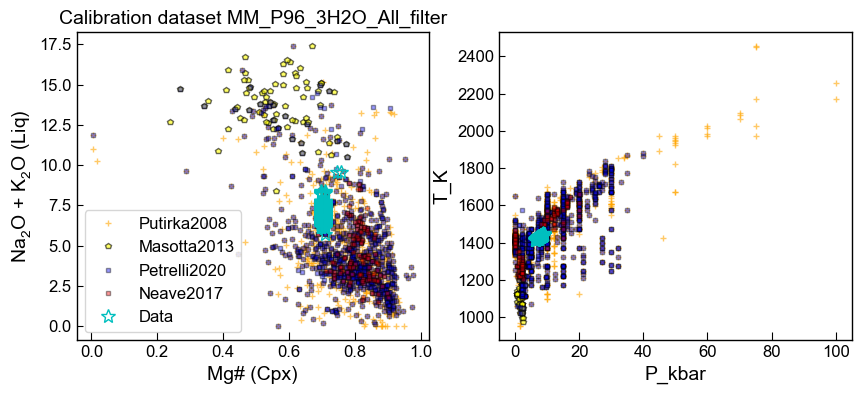

In [52]:
## Calibration Dataset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Putirka08_Cali['Mgno_Cpx'],
         Putirka08_Cali['Na2O_Liq']+Putirka08_Cali['K2O_Liq'],
         '+', ms=4, color='orange', label='Putirka2008', alpha=0.6)

ax1.plot(Masotta_Cali['Mgno_Cpx'],
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=4, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'],
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.4, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'],
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax1.plot(MM_P96_3H20_All_filter['Mgno_Cpx'],MM_P96_3H20_All_filter['Na2O_Liq']+MM_P96_3H20_All_filter['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')
ax1.set_title('Calibration dataset MM_P96_3H2O_All_filter')

y2='T_K'
x2='P_kbar'

ax2.plot(Putirka08_Cali[x2],
         Putirka08_Cali[y2],
         '+', ms=4, label='Putirka2008', color='orange', alpha=0.6)


ax2.plot(Masotta_Cali[x2],
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=4,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2],
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.4)

ax2.plot(Neave_Cali[x2],
         Neave_Cali[y2],
         'sk', mfc='red', ms=3, label='Neave2017', alpha=0.4)

ax2.plot(MM_P96_3H20_All_filter['P_kbar_calc'],MM_P96_3H20_All_filter['T_K_calc'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)

fig.savefig('Calibration dataset MM_P96_3H2O_All_filter.png', dpi=1200)